In [1]:
import pandas as pd
import re
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import scipy.stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.model_selection import train_test_split
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.seasonal import seasonal_decompose
from scipy.stats import shapiro

Exercice 1 :

1)

In [2]:
df = pd.read_csv("employment.csv")

2)

In [3]:
df.head()

,datestamp,Agriculture,Business services,Construction,Durable goods manufacturing,Education and Health,Finance,Government,Information,Leisure and hospitality,Manufacturing,Mining and Extraction,Nondurable goods manufacturing,Other,Self-employed,Transportation and Utilities,Wholesale and Retail Trade
0,2000-01-01,10.3,5.7,9.7,3.2,2.3,2.7,2.1,3.4,7.5,3.6,3.9,4.4,4.9,2.3,4.3,5.0
1,2000-02-01,11.5,5.2,10.6,2.9,2.2,2.8,2.0,2.9,7.5,3.4,5.5,4.2,4.1,2.5,4.0,5.2
2,2000-03-01,10.4,5.4,8.7,2.8,2.5,2.6,1.5,3.6,7.4,3.6,3.7,5.1,4.3,2.0,3.5,5.1
3,2000-04-01,8.9,4.5,5.8,3.4,2.1,2.3,1.3,2.4,6.1,3.7,4.1,4.0,4.2,2.0,3.4,4.1
4,2000-05-01,5.1,4.7,5.0,3.4,2.7,2.2,1.9,3.5,6.2,3.4,5.3,3.6,4.5,1.9,3.4,4.3


3)

In [4]:
df = df.dropna()
df = df.drop_duplicates()

4)

In [5]:
df.dtypes

datestamp                          object
Agriculture                       float64
Business services                 float64
Construction                      float64
Durable goods manufacturing       float64
Education and Health              float64
Finance                           float64
Government                        float64
Information                       float64
Leisure and hospitality           float64
Manufacturing                     float64
Mining and Extraction             float64
Nondurable goods manufacturing    float64
Other                             float64
Self-employed                     float64
Transportation and Utilities      float64
Wholesale and Retail Trade        float64
dtype: object

5)

In [6]:
adfuller(df["Finance"])

(0.28031052330435935,
 0.976422890871575,
 1,
 120,
 {'1%': -3.486055829282407,
  '5%': -2.8859430324074076,
  '10%': -2.5797850694444446},
 117.10886994512148)

p est supérieur à 0.05 (égal à 0.976) donc la colonne Finance n'est pas stationnaire.

6)

7)

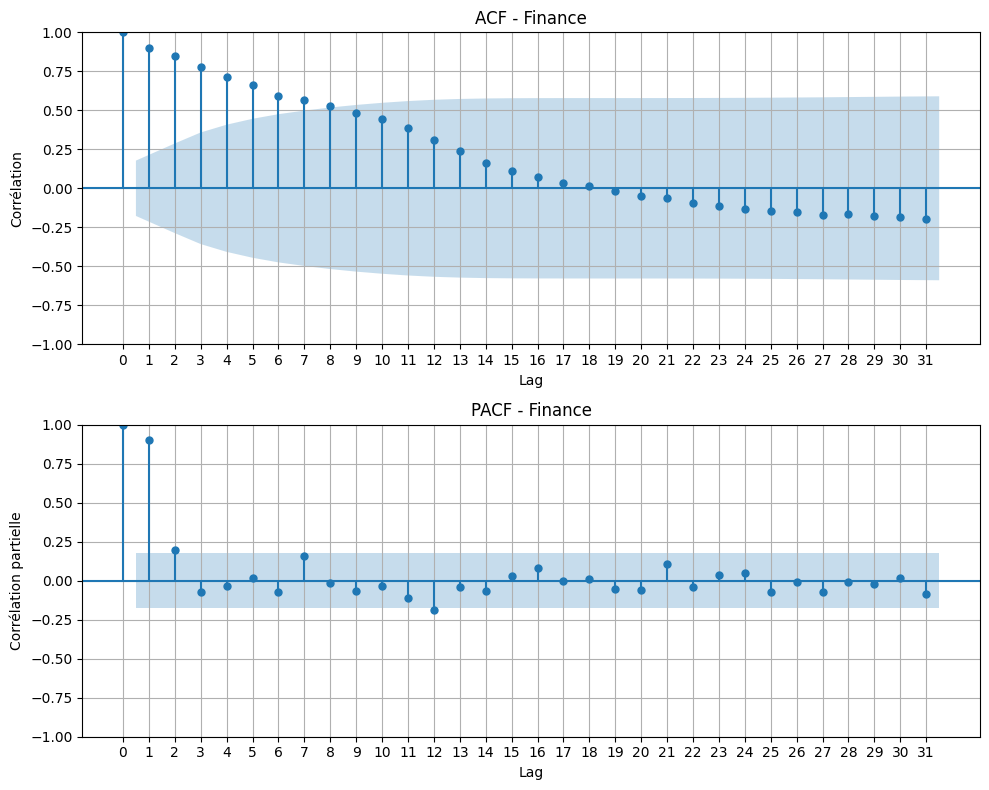

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(df["Finance"], lags=31, zero=True, ax=ax1)
ax1.set_title('ACF - Finance')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

ax1.set_xticks(np.arange(0, 32, 1))

plot_pacf(df["Finance"], lags=31, zero=True, ax=ax2)
ax2.set_title('PACF - Finance')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

ax2.set_xticks(np.arange(0, 32, 1))

plt.tight_layout()

plt.show()

p =1, d = 1, q =6

8)

In [8]:
train_data = df["Finance"][:-24]
test_data = df["Finance"][-24:]

9)

In [9]:
model = ARIMA(train_data, order=(1,1,6))
model_fit = model.fit()

10)

In [10]:
print(test_data.index[0])

98


<Figure size 1000x600 with 0 Axes>

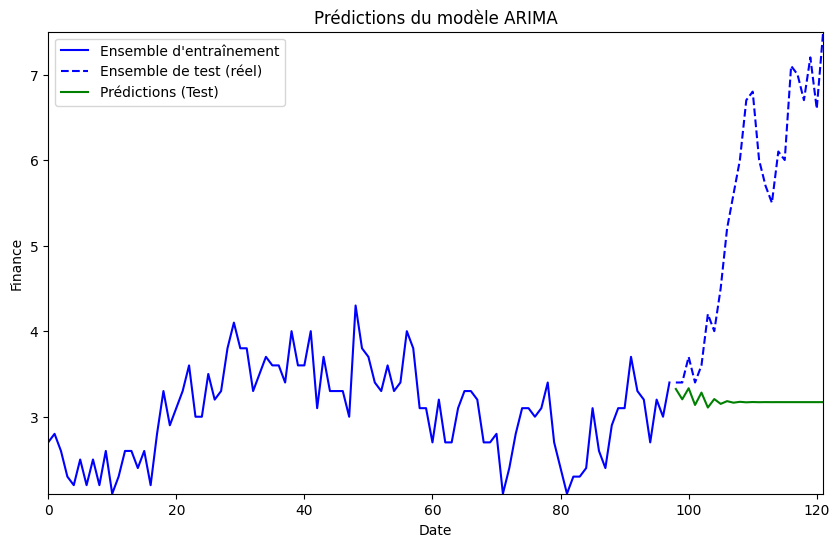

7.2229913557339


In [11]:
predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

plt.figure(figsize=(10, 6))
plt.figure(figsize=(10, 6))
plt.plot(train_data.index, train_data.values, label='Ensemble d\'entraînement', color='blue')
plt.plot(test_data.index, test_data.values, label='Ensemble de test (réel)', color='blue', linestyle='--')
plt.plot(test_data.index, predictions, label='Prédictions (Test)', color='green')

plt.xlim(train_data.index[0], test_data.index[-1])
plt.ylim(min(train_data.min(), test_data.min()), max(train_data.max(), test_data.max()))

plt.xlabel('Date')
plt.ylabel('Finance')
plt.title('Prédictions du modèle ARIMA')
plt.legend()
plt.show()

test_mse = mean_squared_error(test_data, predictions)
print(test_mse)

11)

In [12]:
sm.stats.acorr_ljungbox(model_fit.resid, lags=[20], return_df=True)

,lb_stat,lb_pvalue
20,9.201249,0.980457


p est supérieur à 0.05 donc les résidus sont indépendants.

12)

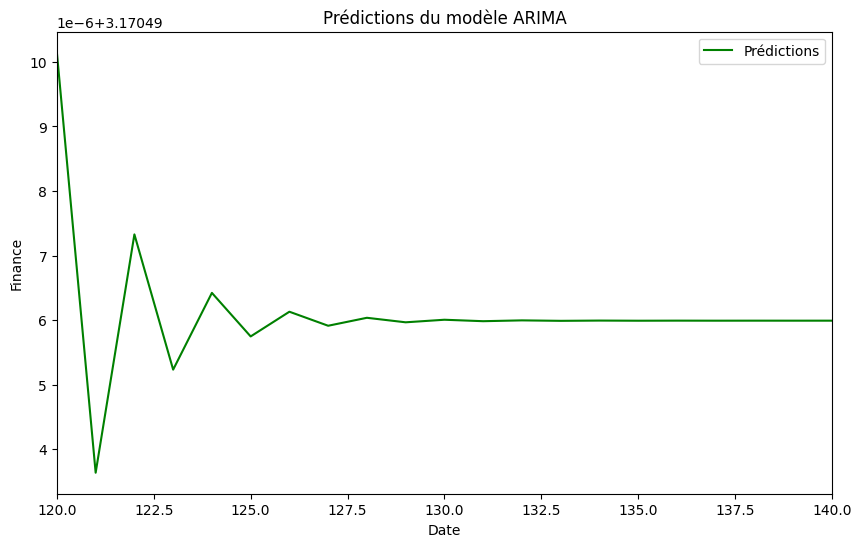

In [13]:
predictions = model_fit.predict(start=120, end=140)
plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Prédictions', color='green')

plt.xlim(120, 140)

plt.xlabel('Date')
plt.ylabel('Finance')
plt.title('Prédictions du modèle ARIMA')
plt.legend()
plt.show()

Exercice 2 :

1)

In [14]:
df = pd.read_csv("AEP_hourly.csv")
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


2)

In [15]:
df["Datetime"] = pd.to_datetime(df["Datetime"])

3)

In [16]:
df = df.set_index("Datetime")
df

,AEP_MW
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0
...,...
2018-01-01 20:00:00,21089.0
2018-01-01 21:00:00,20999.0
2018-01-01 22:00:00,20820.0


4)

In [17]:
df = df.groupby(pd.Grouper(freq='D')).sum()
df = df.drop(index="2018-08-03  ")
df.iloc[-10:]["AEP_MW"]

Datetime
2018-07-24    381373.0
2018-07-25    396080.0
2018-07-26    395382.0
2018-07-27    379599.0
2018-07-28    338714.0
2018-07-29    327792.0
2018-07-30    368834.0
2018-07-31    364327.0
2018-08-01    363628.0
2018-08-02    376504.0
Freq: D, Name: AEP_MW, dtype: float64

5)

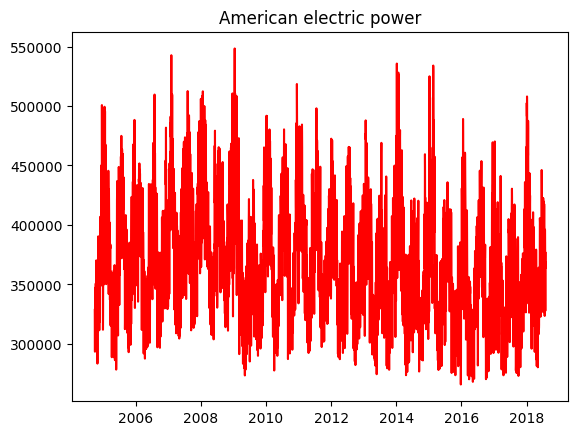

In [18]:
plt.plot(df, color = "red")
plt.title("American electric power")
plt.show()

6)

Cette série me semble stationnaire.

7)

In [19]:
adfuller(df)[1]

4.432686385886087e-11

p est inférieur à 0.05 donc la série est bien stationnaire.

9)

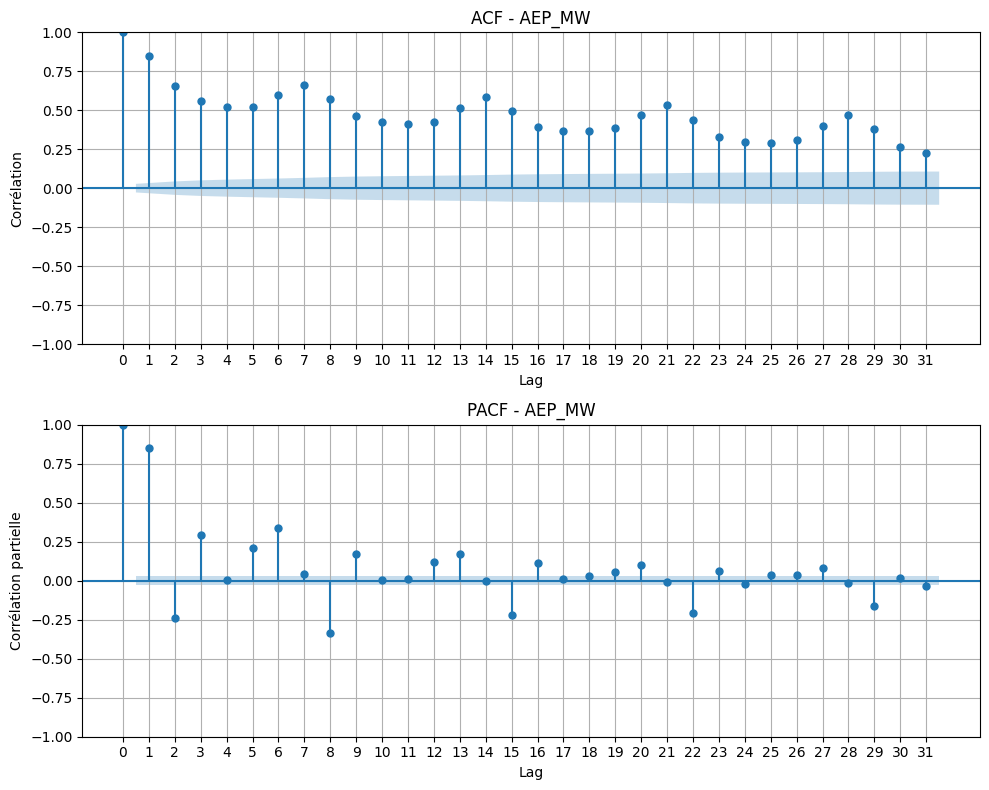

In [20]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(df["AEP_MW"], lags=31, zero=True, ax=ax1)
ax1.set_title('ACF - AEP_MW')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

ax1.set_xticks(np.arange(0, 32, 1))

plot_pacf(df["AEP_MW"], lags=31, zero=True, ax=ax2)
ax2.set_title('PACF - AEP_MW')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

ax2.set_xticks(np.arange(0, 32, 1))

plt.tight_layout()

plt.show()

p = 1, d = 0, q = 1

In [21]:
train_data = df["AEP_MW"][:-1000]
test_data = df["AEP_MW"][-1000:]
model = ARIMA(train_data, order=(1,1,6))
model_fit = model.fit()

In [22]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 AEP_MW   No. Observations:                 4054
Model:                 ARIMA(1, 1, 6)   Log Likelihood              -46419.225
Date:                Thu, 13 Mar 2025   AIC                          92854.450
Time:                        15:44:17   BIC                          92904.908
Sample:                    10-01-2004   HQIC                         92872.324
                         - 11-06-2015                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.4600      0.079     -5.837      0.000      -0.615      -0.306
ma.L1          0.5842      0.079      7.408      0.000       0.430       0.739
ma.L2         -0.4041      0.021    -19.049      0.0

Le AIC et BIC du modèle ARIMA sont très élevés, le modèle n'est donc pas convenable.

Exercice 3 :

1)

In [23]:
df = pd.read_csv("shampo.csv")

2)

In [24]:
df.head(3)

,Month,Sales
0,1-Jan,266.0
1,2-Jan,145.9
2,3-Jan,183.1


3)

In [25]:
df = df.dropna()
df = df.drop_duplicates()
df

,Month,Sales
0,1-Jan,266.0
1,2-Jan,145.9
2,3-Jan,183.1
3,4-Jan,119.3
4,5-Jan,180.3
5,6-Jan,168.5
6,7-Jan,231.8
7,8-Jan,224.5
8,9-Jan,192.8
9,10-Jan,122.9


4)

In [26]:
dates = pd.date_range(start='2001-01-01', end='2003-12-01', freq='MS')

df = pd.DataFrame({'Date': dates, 'Sales': df['Sales'] })

5)

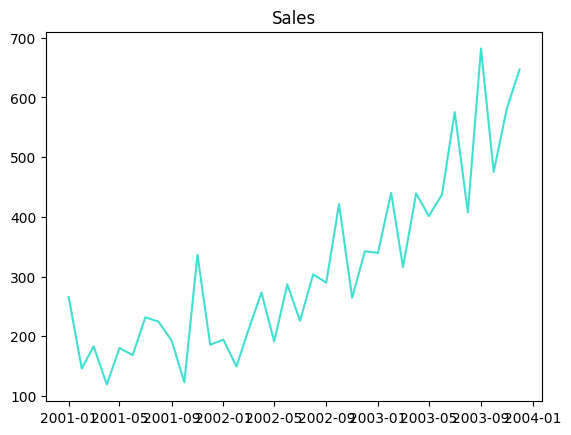

In [27]:
df = df.set_index("Date")
plt.plot(df,color='turquoise')
plt.title("Sales")
plt.show()

Modèle multiplicatif car les droites ne sont pas parallèles..

6)

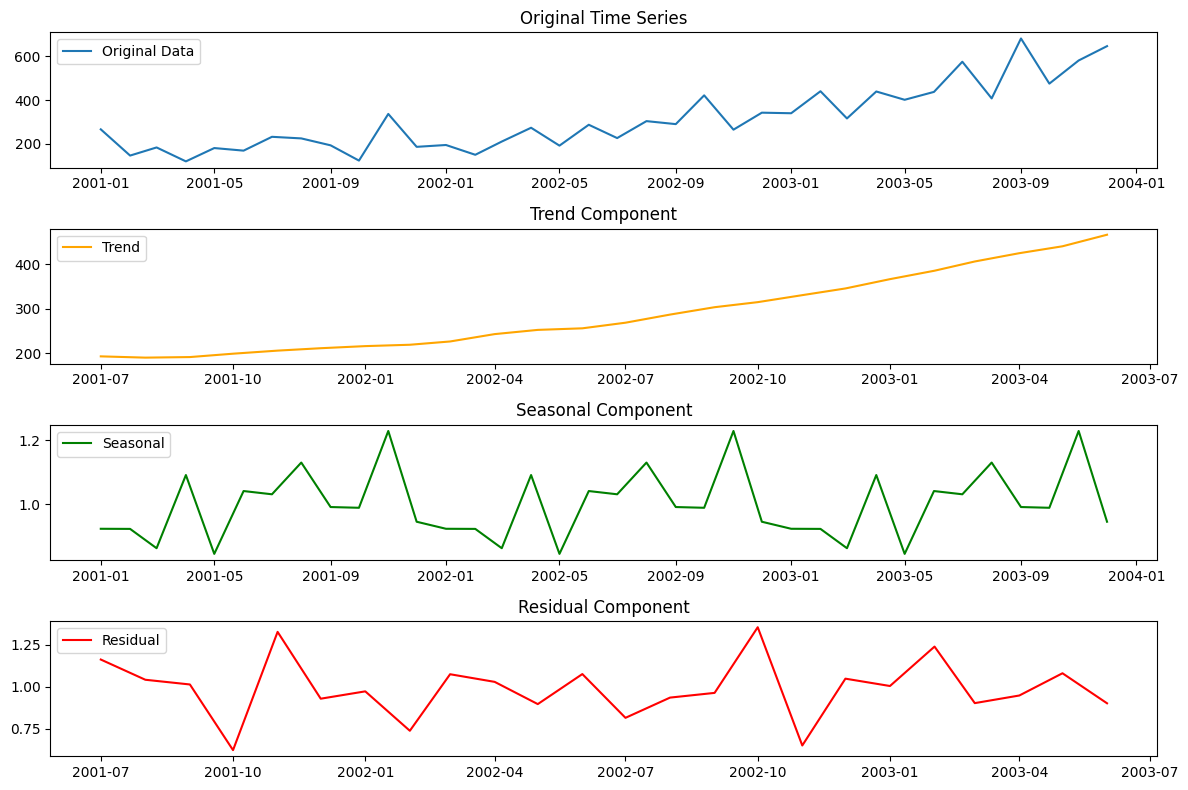

In [28]:
result = seasonal_decompose(df['Sales'], model='multiplicative')

trend = result.trend
seasonal = result.seasonal
residual = result.resid

plt.figure(figsize=(12, 8))

plt.subplot(4, 1, 1)
plt.plot(df['Sales'], label='Original Data')
plt.legend(loc='upper left')
plt.title('Original Time Series')

plt.subplot(4, 1, 2)
plt.plot(trend, label='Trend', color='orange')
plt.legend(loc='upper left')
plt.title('Trend Component')

plt.subplot(4, 1, 3)
plt.plot(seasonal, label='Seasonal', color='green')
plt.legend(loc='upper left')
plt.title('Seasonal Component')

plt.subplot(4, 1, 4)
plt.plot(residual, label='Residual', color='red')
plt.legend(loc='upper left')
plt.title('Residual Component')

plt.tight_layout()
plt.show()

7)

In [29]:
adfuller(df)

(3.0601420836411775,
 1.0,
 10,
 25,
 {'1%': -3.7238633119999998, '5%': -2.98648896, '10%': -2.6328004},
 278.9972644263031)

p > 0.05 donc la série n'est pas stationnaire.

In [30]:
differenced = df['Sales'].diff().dropna()
adfuller(differenced)

(-7.249074055553857,
 1.7998574141686703e-10,
 1,
 33,
 {'1%': -3.6461350877925254,
  '5%': -2.954126991123355,
  '10%': -2.6159676124885216},
 275.32503579406307)

Avec une différentiation, la série est stationnaire donc d = 1.

8)

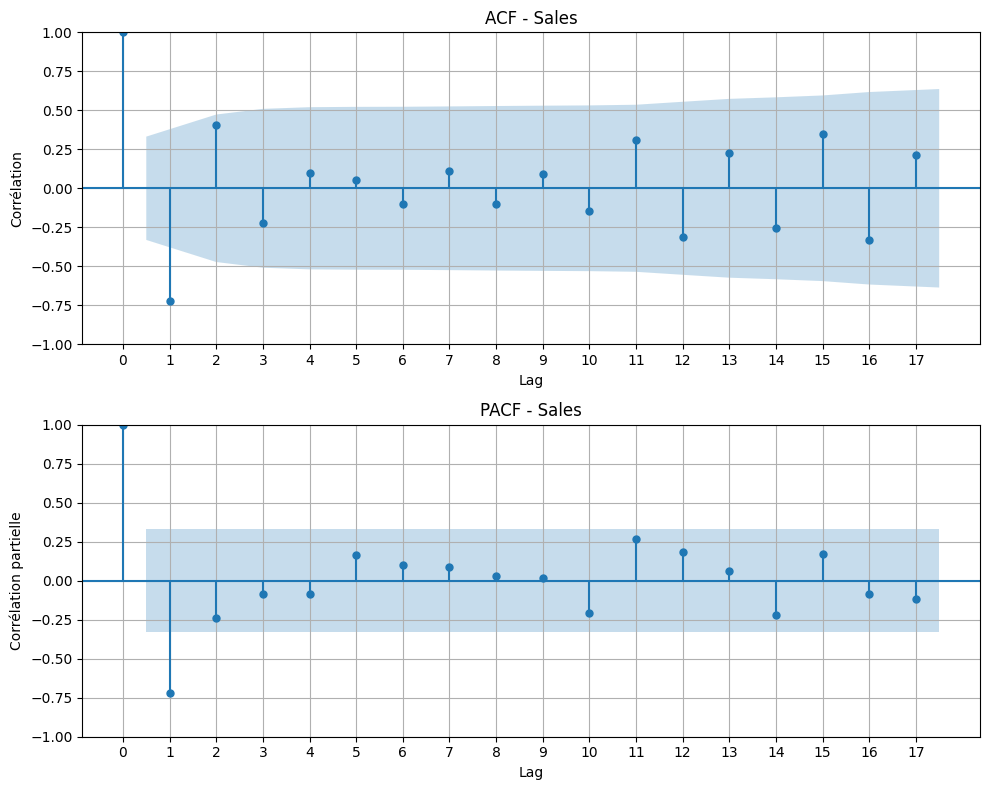

In [31]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

plot_acf(differenced, lags=17, zero=True, ax=ax1)
ax1.set_title('ACF - Sales')
ax1.set_xlabel('Lag')
ax1.set_ylabel('Corrélation')
ax1.grid(True)

ax1.set_xticks(np.arange(0, 18, 1))

plot_pacf(differenced, lags=17, zero=True, ax=ax2)
ax2.set_title('PACF - Sales')
ax2.set_xlabel('Lag')
ax2.set_ylabel('Corrélation partielle')
ax2.grid(True)

ax2.set_xticks(np.arange(0, 18, 1))

plt.tight_layout()

plt.show()

p = 2, d = 1, q = 2

9)

In [32]:
train_data = differenced[:-5]
test_data = differenced[-5:]
model = ARIMA(train_data, order=(1,1,1))
model_fit = model.fit()

predictions = model_fit.predict(start=test_data.index[0], end=test_data.index[-1])

test_mse = mean_squared_error(test_data, predictions)
print(test_mse)

C:\Users\cabro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cabro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\cabro\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


18997.428888054623


Le MSE est énorme donc le modèle ne semble pas adapté.

10)

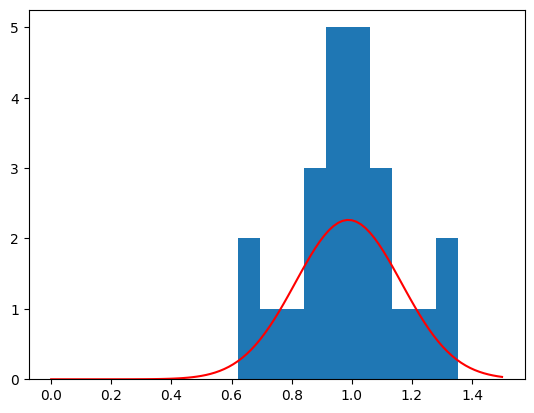

In [33]:
mean = np.mean(residual)
std = np.std(residual)

x_min = 0.0
x_max = 1.5
x = np.linspace(x_min, x_max, 100)
y = scipy.stats.norm.pdf(x,mean,std)
plt.plot(x,y, color='red')

plt.hist(residual)
plt.show()

D'après l'histogramme, les résidus ne suivent pas une loi noramle.

11)

In [34]:
stat, p_value = shapiro(df)
print(p_value)

0.01041831075652947


p < 0.05 donc les résidus ne suivent effectivement pas une loi normale.

12)

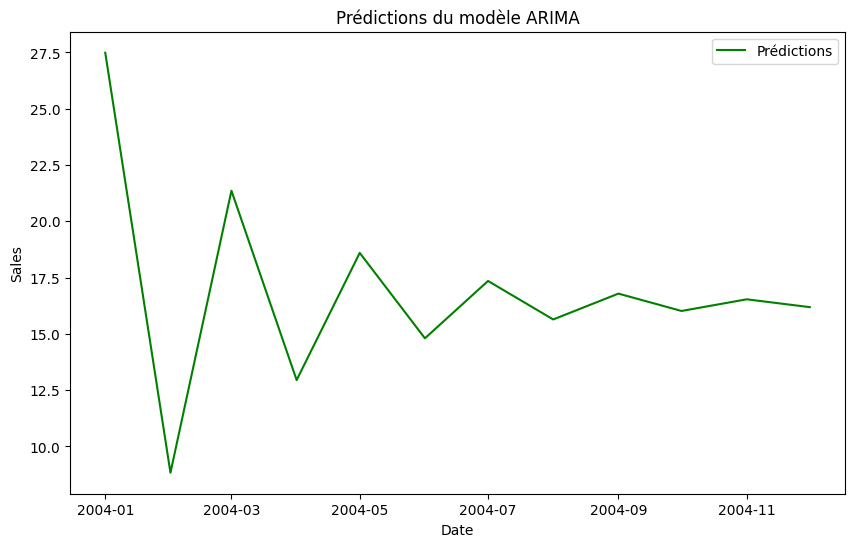

In [35]:
dates = pd.date_range(start='2004-01-01', end='2004-12-01', freq='MS')
predictions = model_fit.predict(start=dates[0], end=dates[-1])

plt.figure(figsize=(10, 6))
plt.plot(predictions, label='Prédictions', color='green')


plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Prédictions du modèle ARIMA')
plt.legend()
plt.show()

13)

Nous pourrions effectivement améliorer le modèle ou même en crér un automatiquement en utilisant le module pmdarima.